In [1]:
import openpmd_api as io
import numpy as np
import matplotlib.pyplot as plt
import os

import sys
sys.path.append('../main/ModelHelpers/cINN/model')

from modules.visualizations import plot_3D, plot_2D, plot_per_slice


print("openPMD-api: {}"
      .format(io.__version__))
print("openPMD-api backend variants: {}"
      .format(io.variants))


openPMD-api: 0.14.5
openPMD-api backend variants: {'adios1': True, 'adios2': True, 'hdf5': True, 'json': True, 'mpi': False}


/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_43_1150_51.npy
(438, 6)


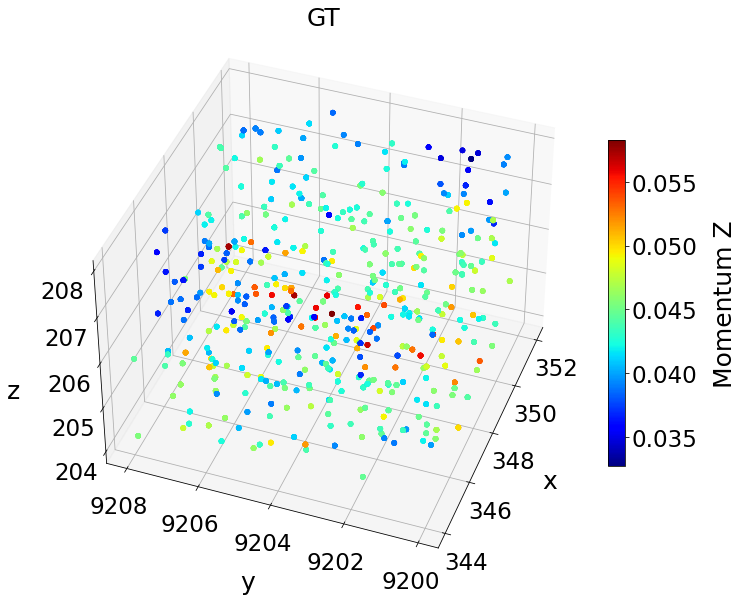

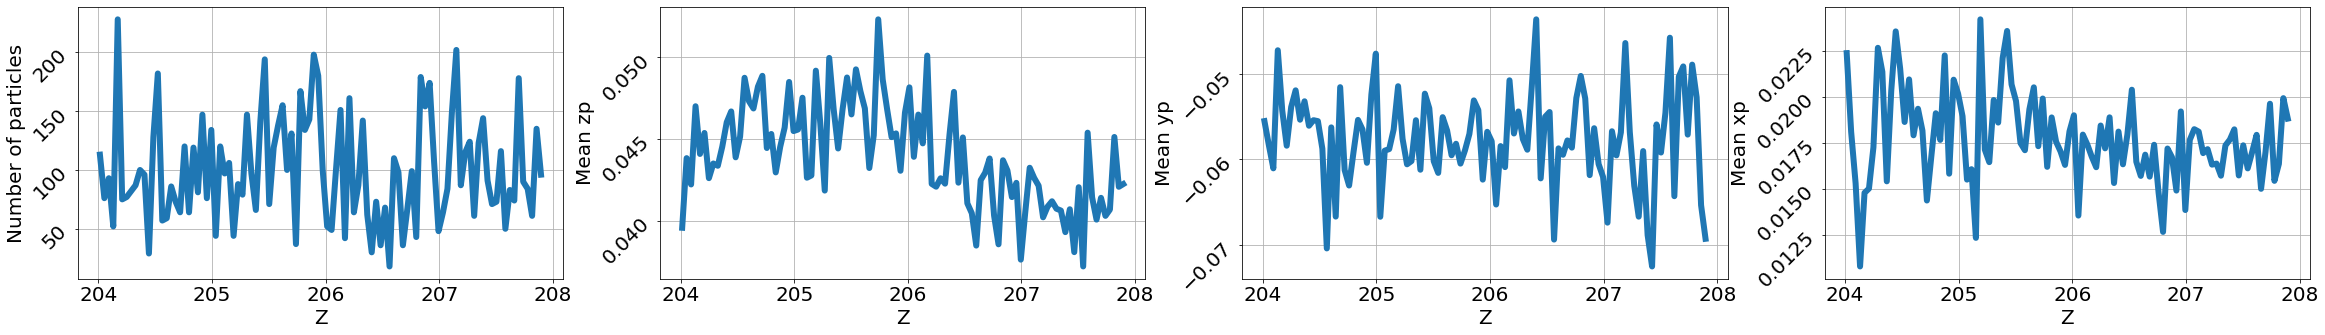

0 0
1 -1
2 -2


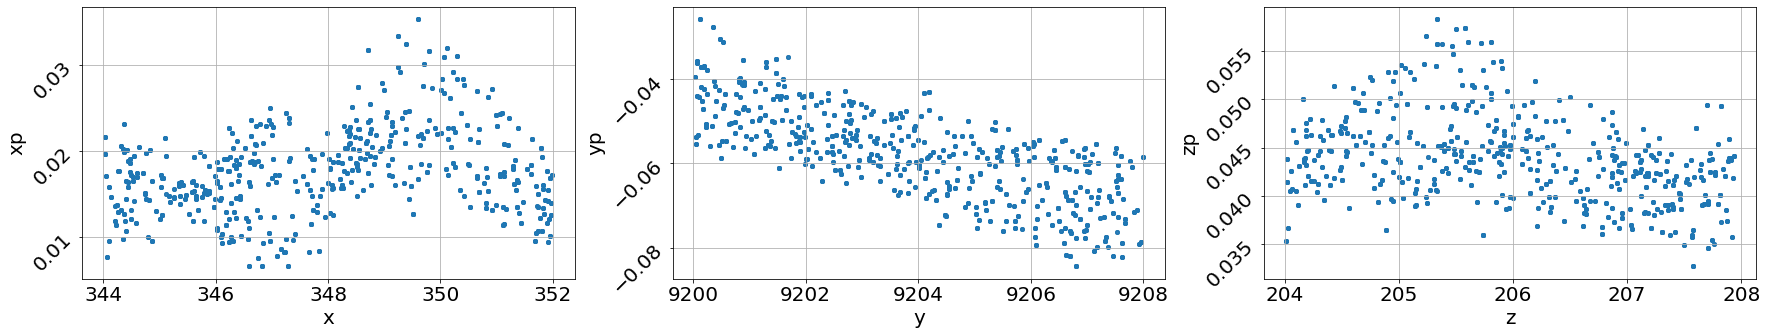

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_44_1151_51.npy
(530, 6)


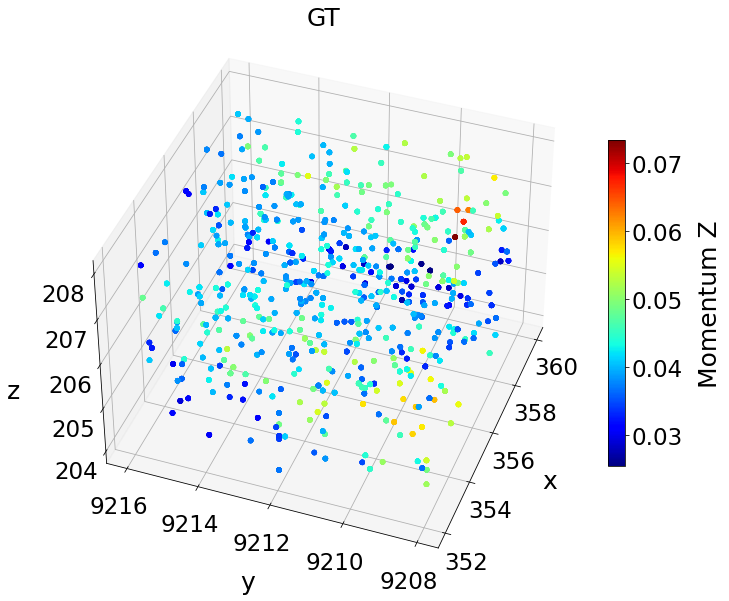

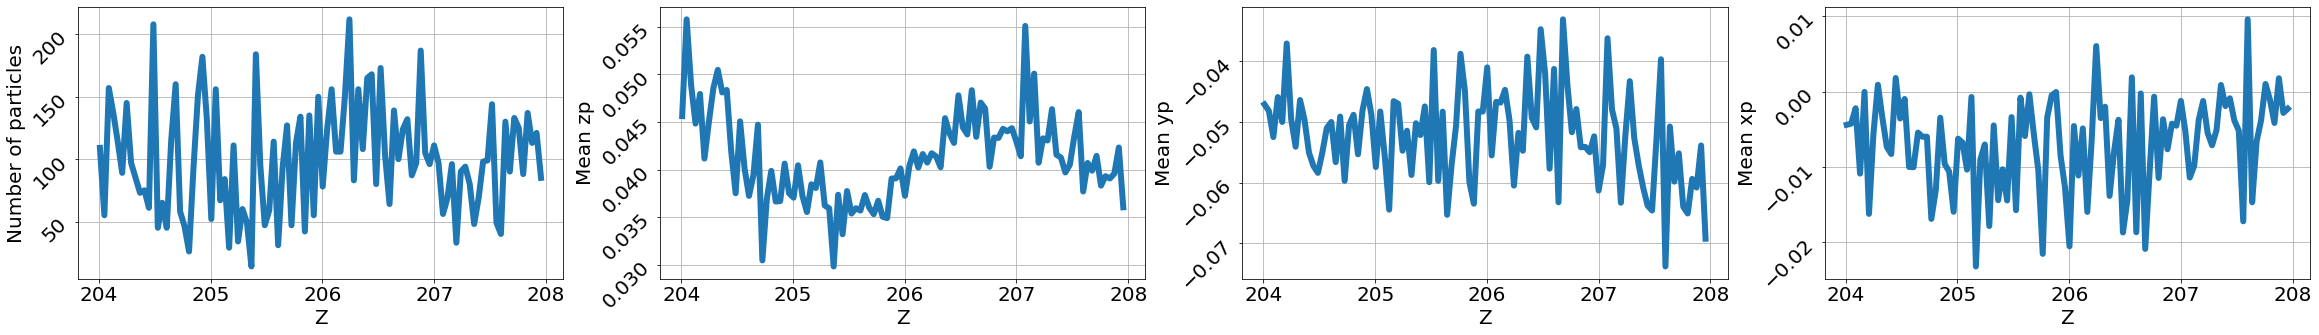

0 0
1 -1
2 -2


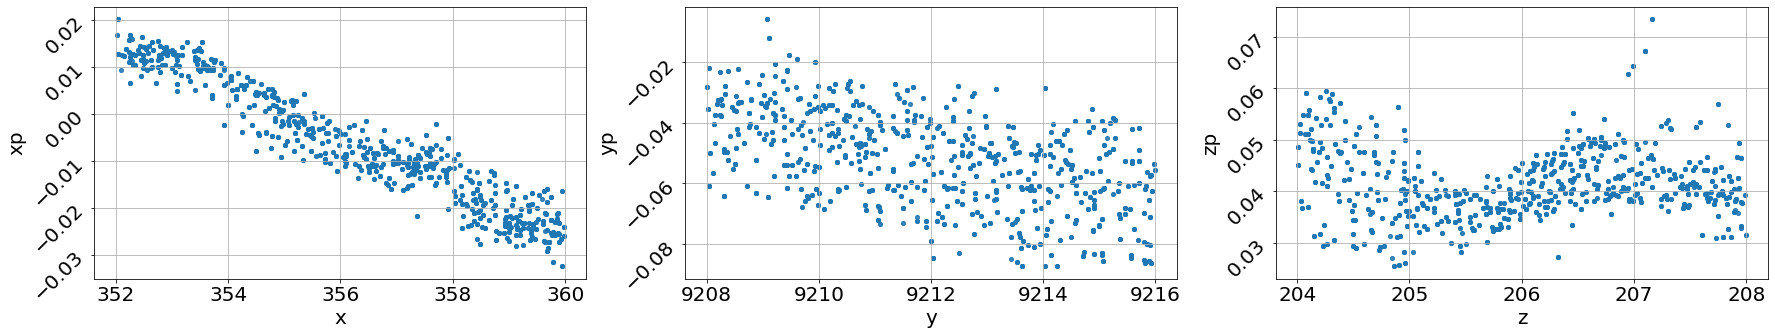

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_43_1151_51.npy
(446, 6)


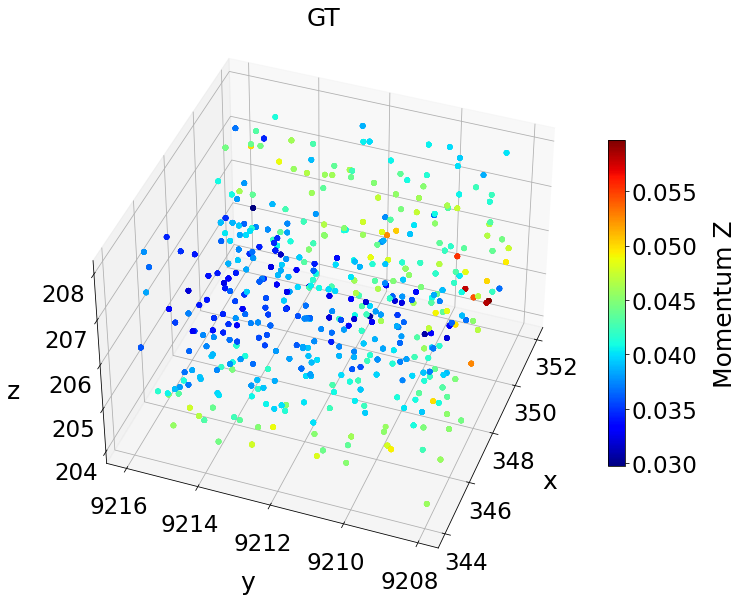

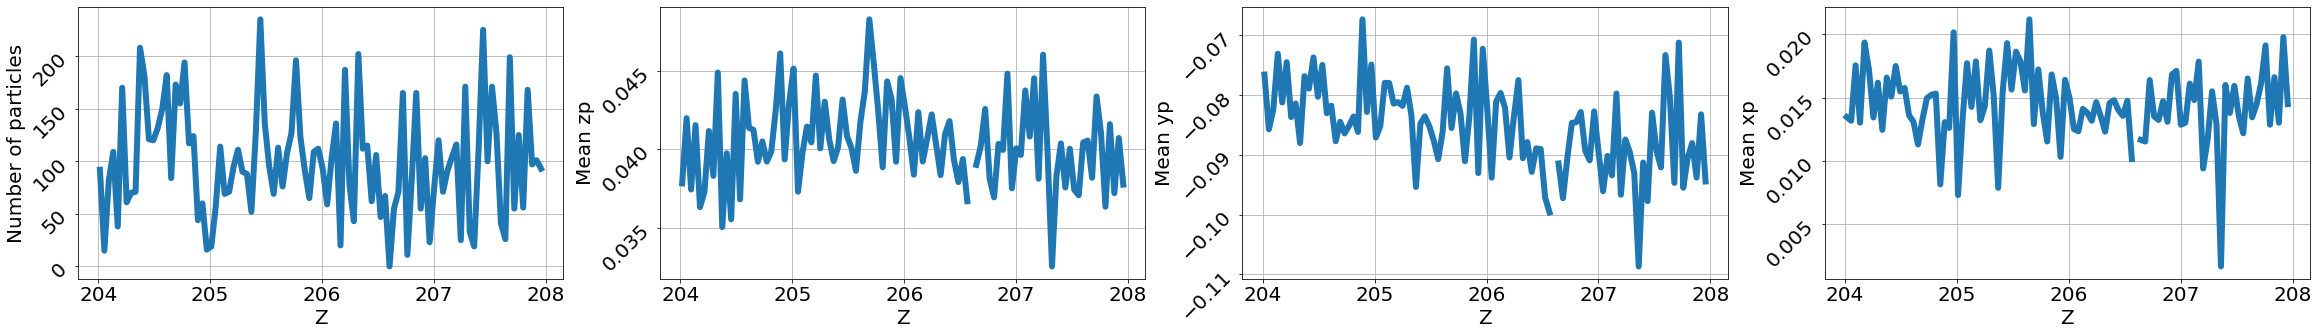

0 0
1 -1
2 -2


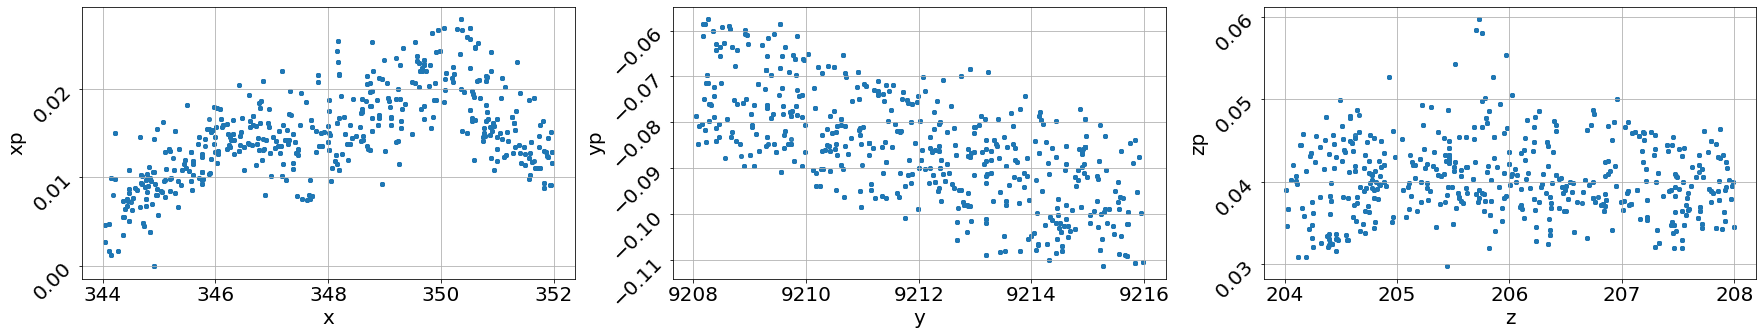

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_44_1150_50.npy
(520, 6)


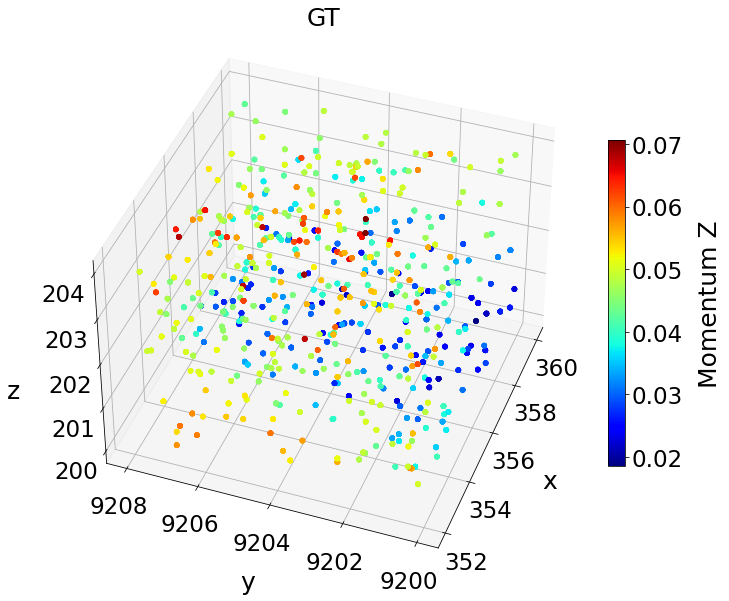

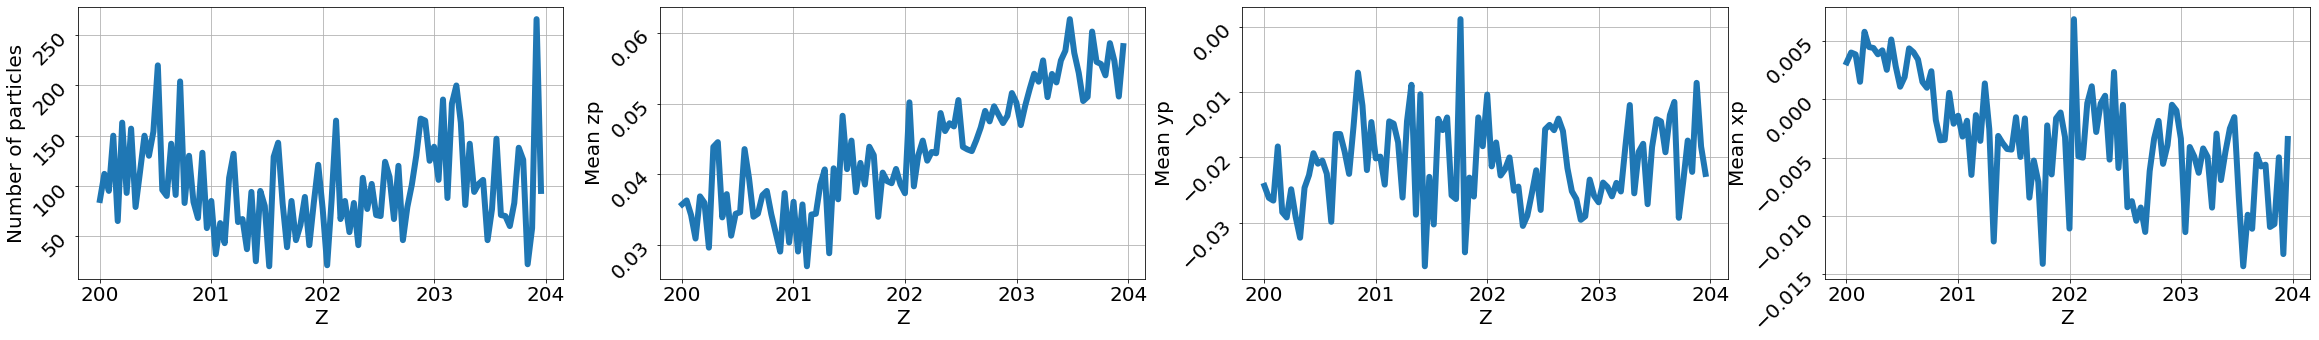

0 0
1 -1
2 -2


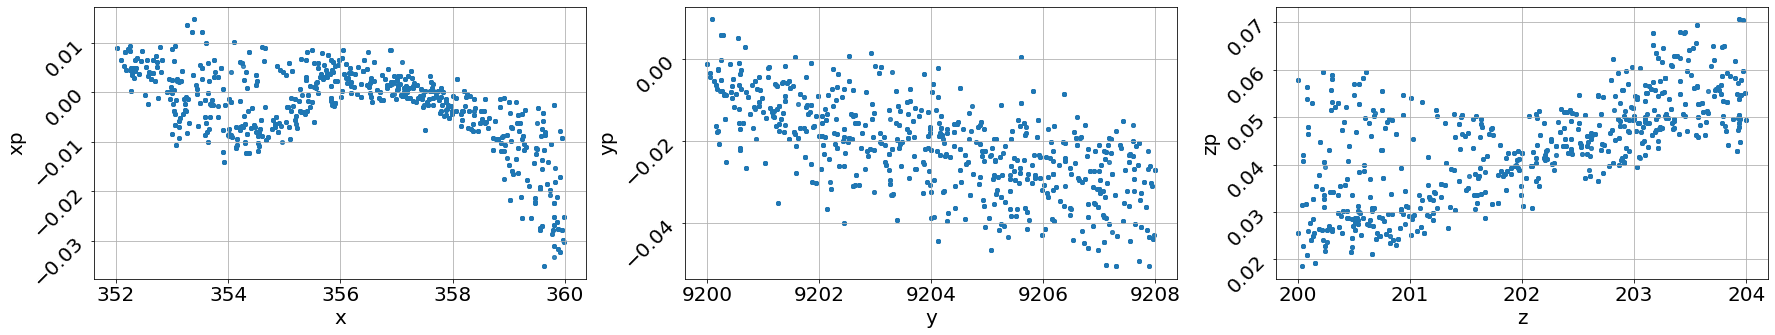

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_43_1150_50.npy
(529, 6)


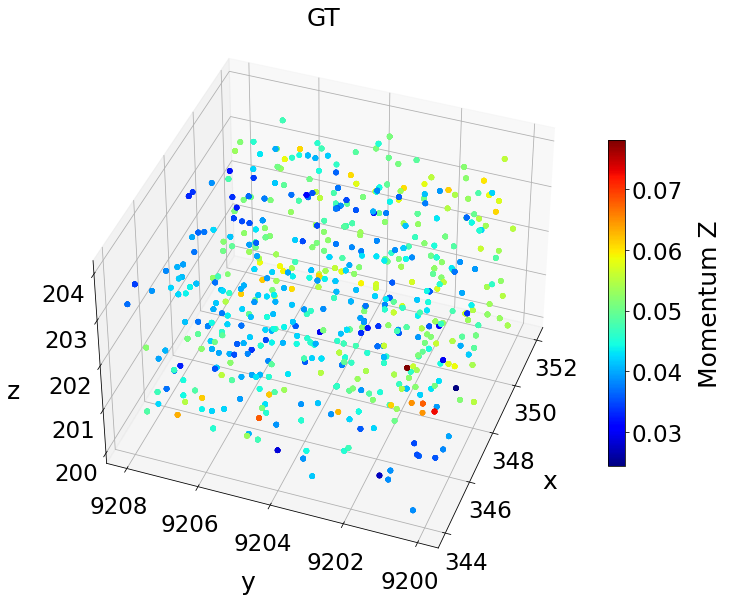

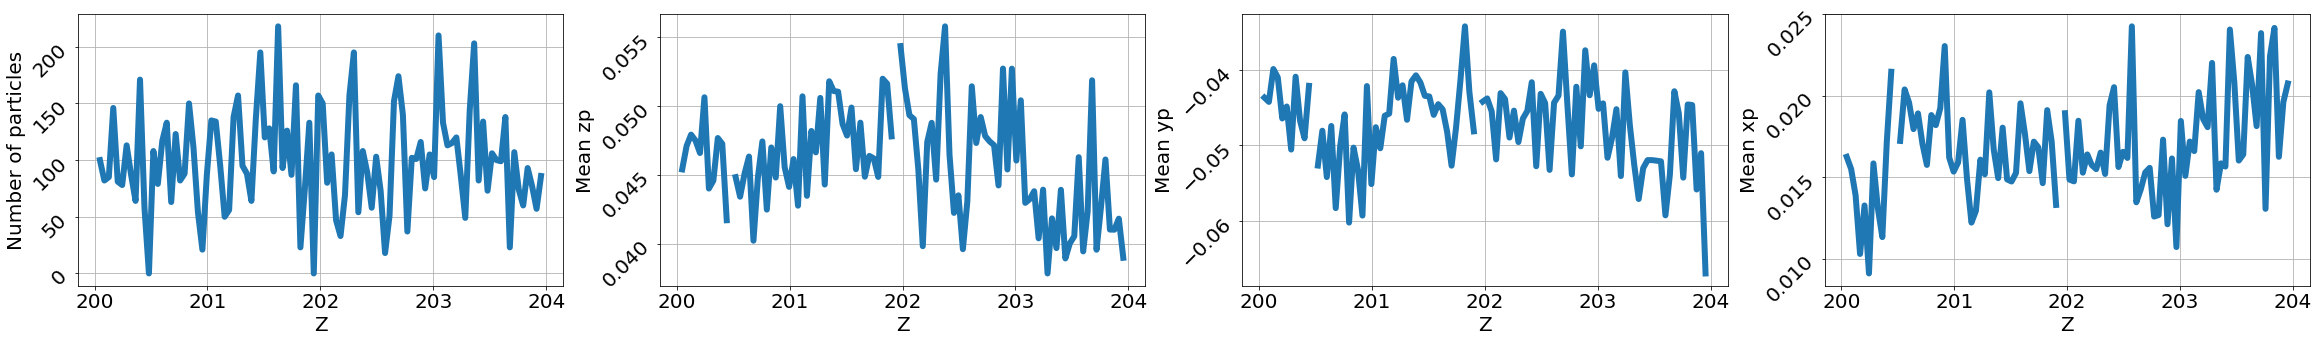

0 0
1 -1
2 -2


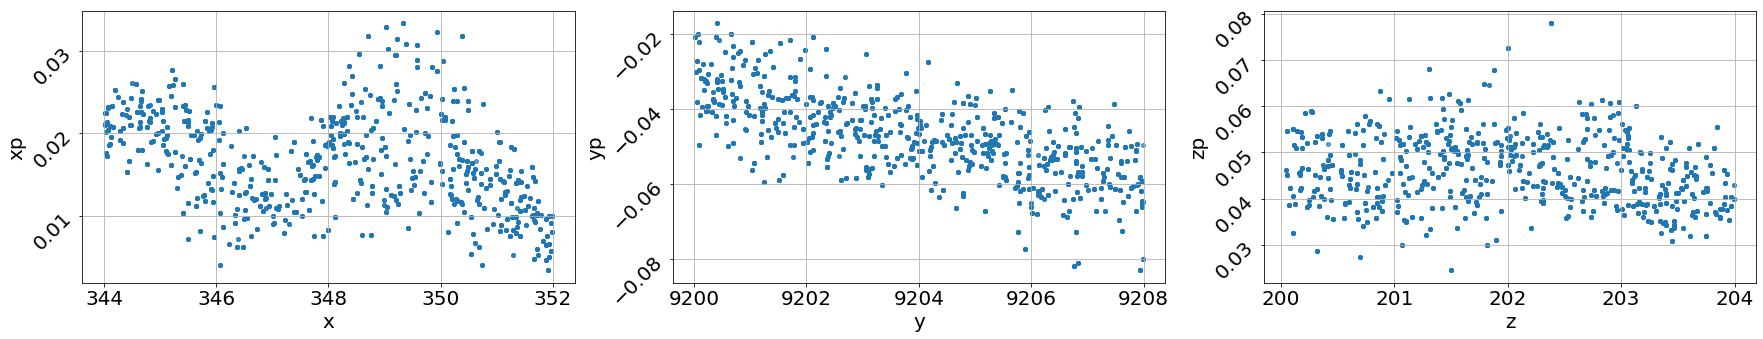

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_43_1151_50.npy
(491, 6)


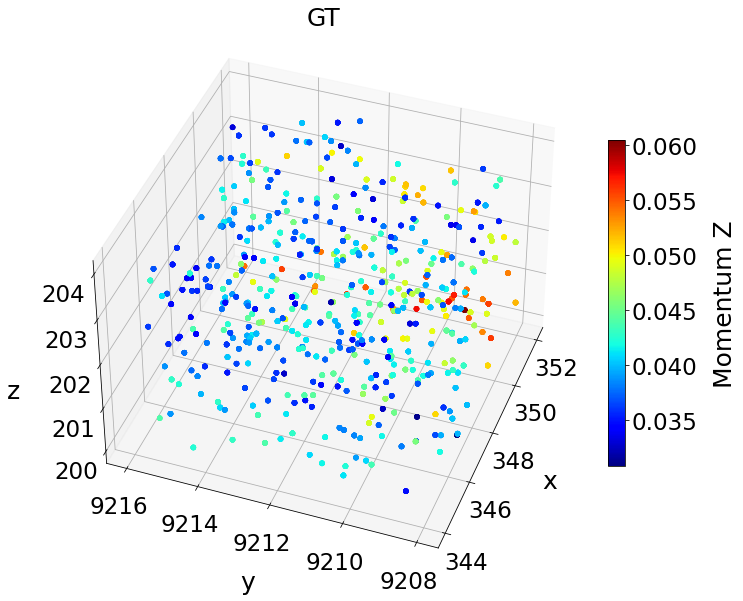

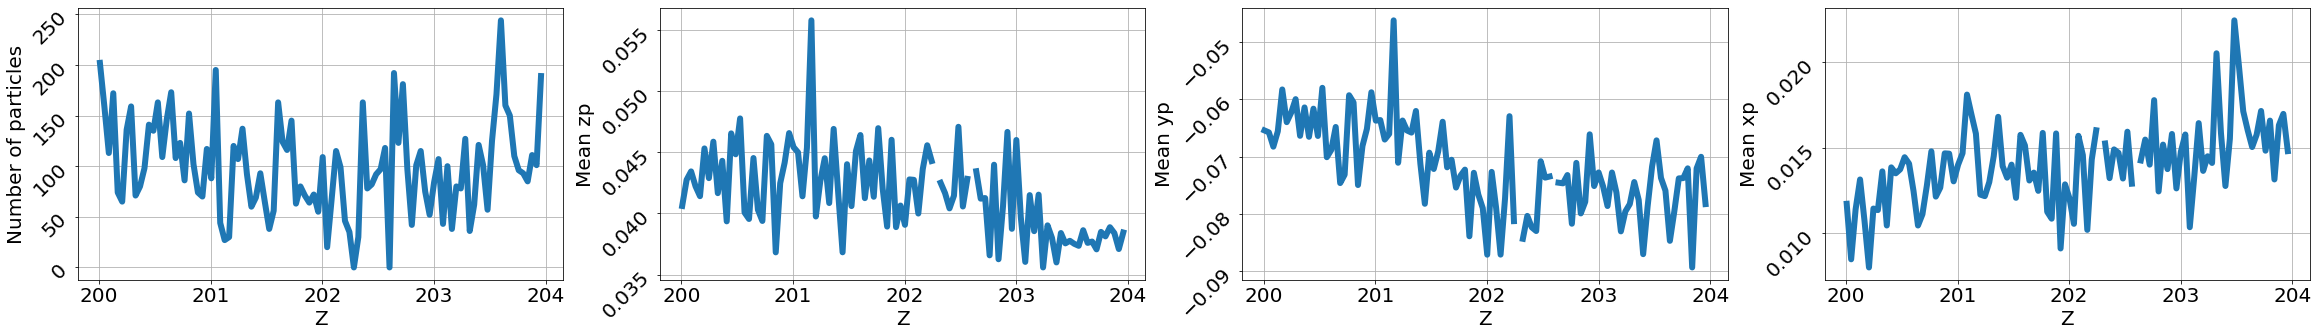

0 0
1 -1
2 -2


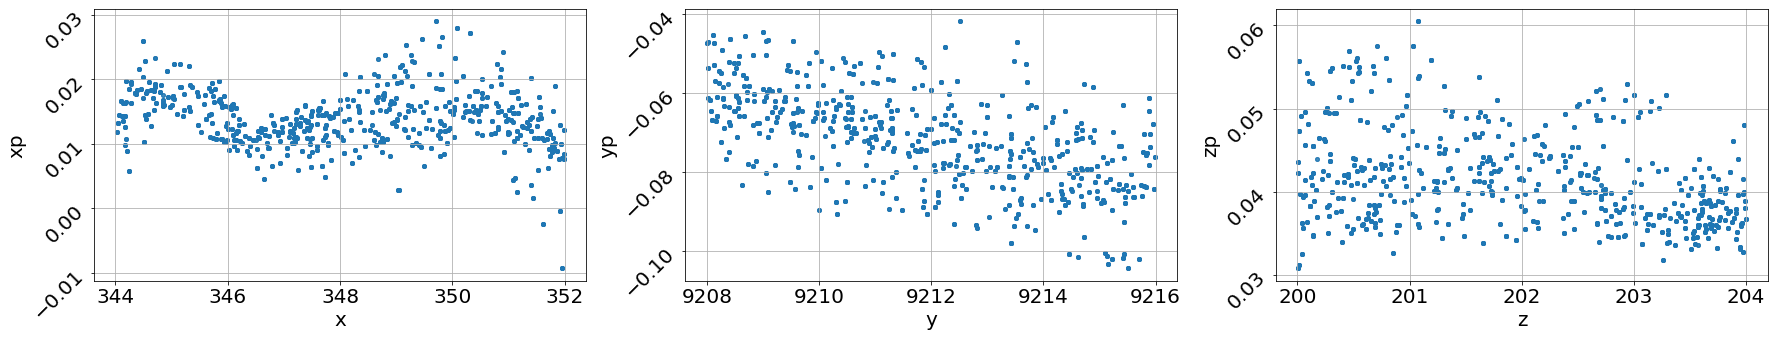

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_44_1151_50.npy
(537, 6)


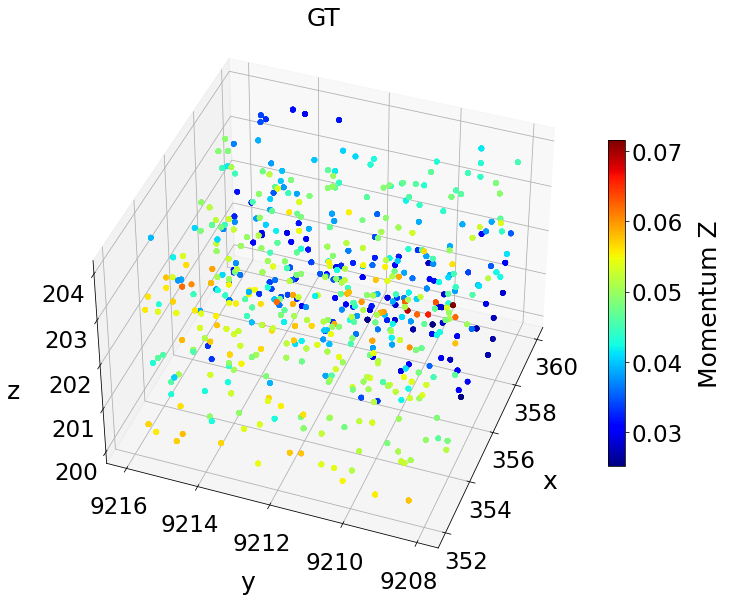

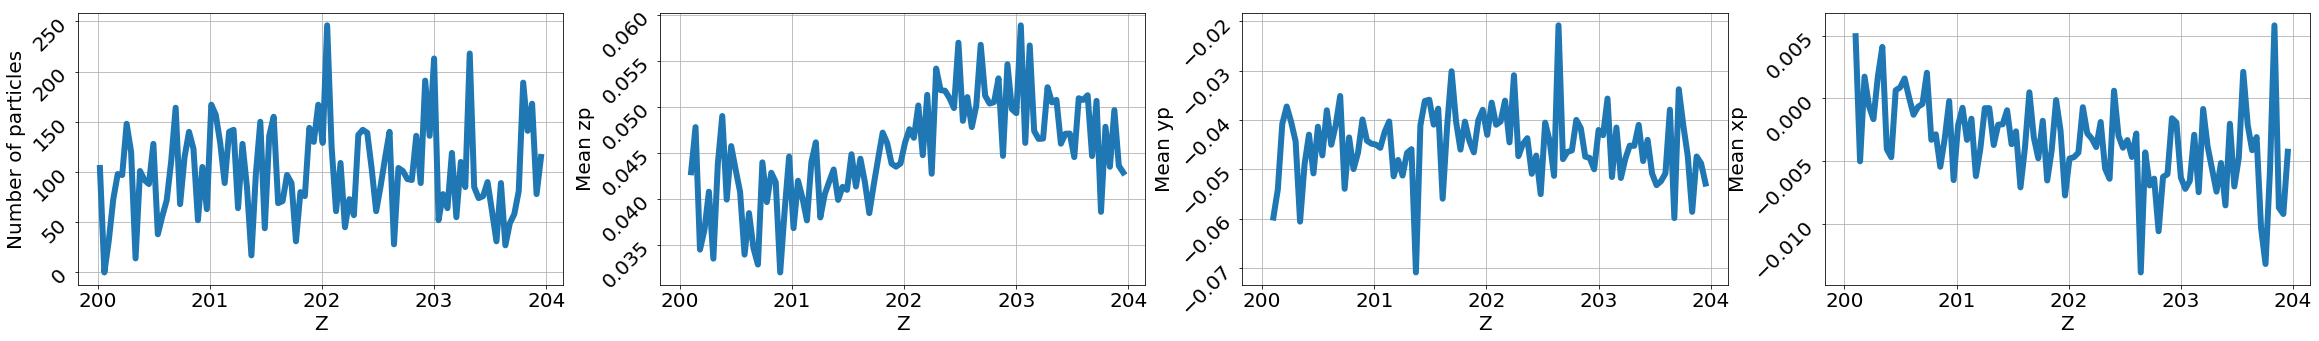

0 0
1 -1
2 -2


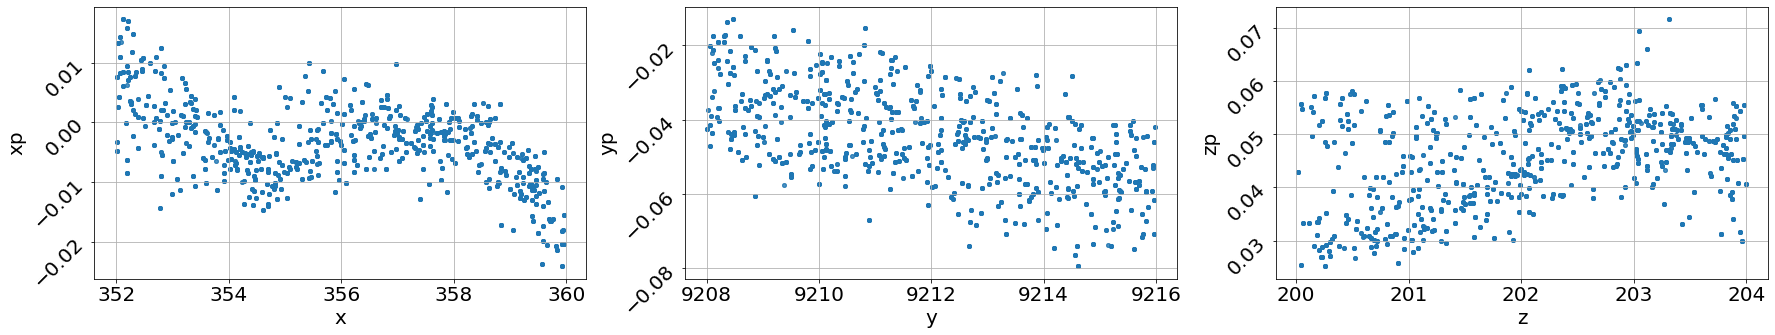

/bigdata/hplsim/aipp/Anna/lwfa_tests/10700_44_1150_51.npy
(569, 6)


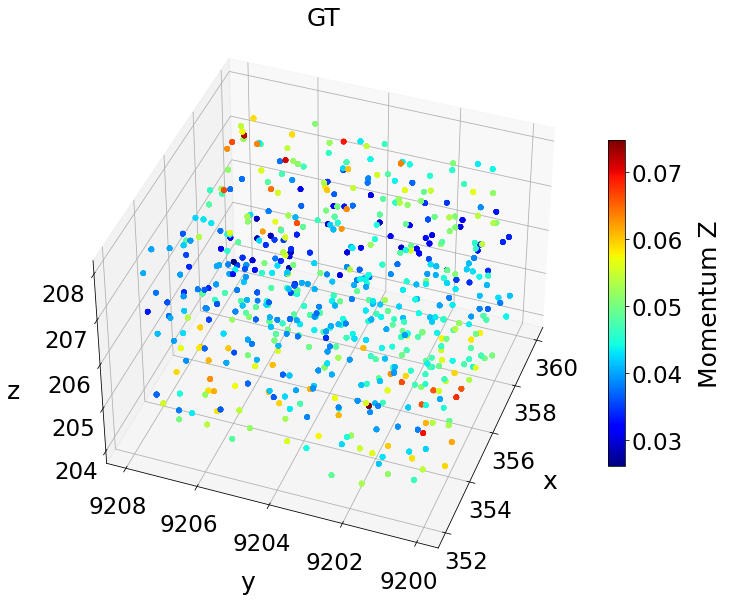

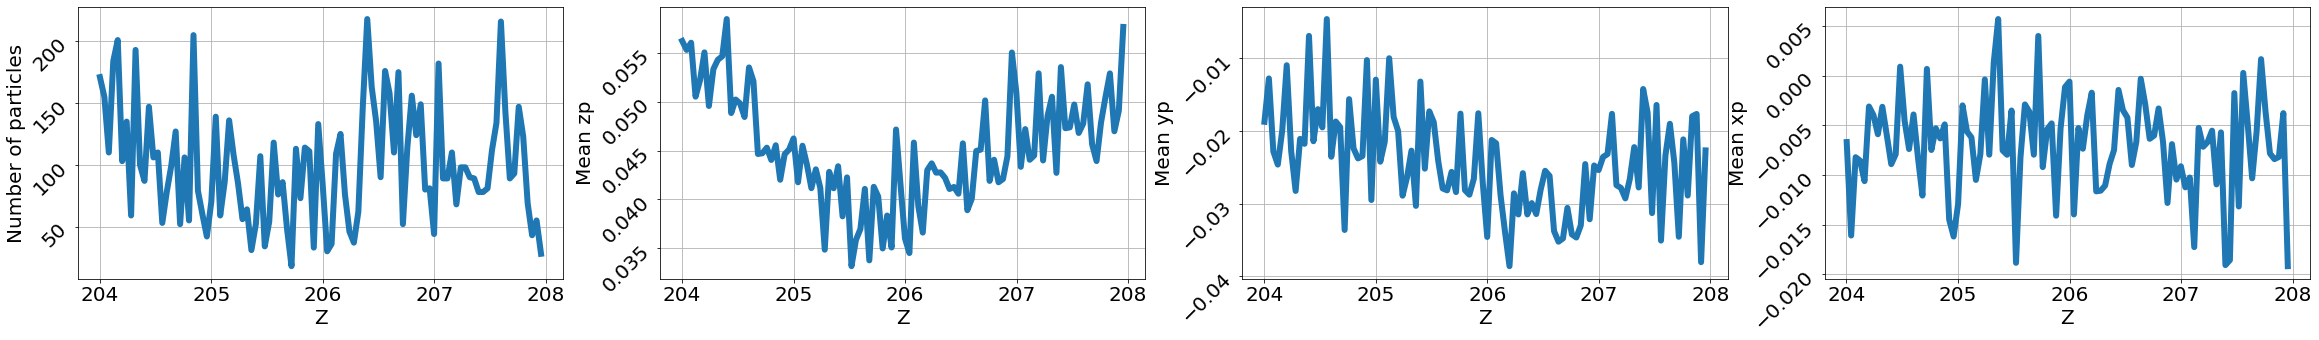

0 0
1 -1
2 -2


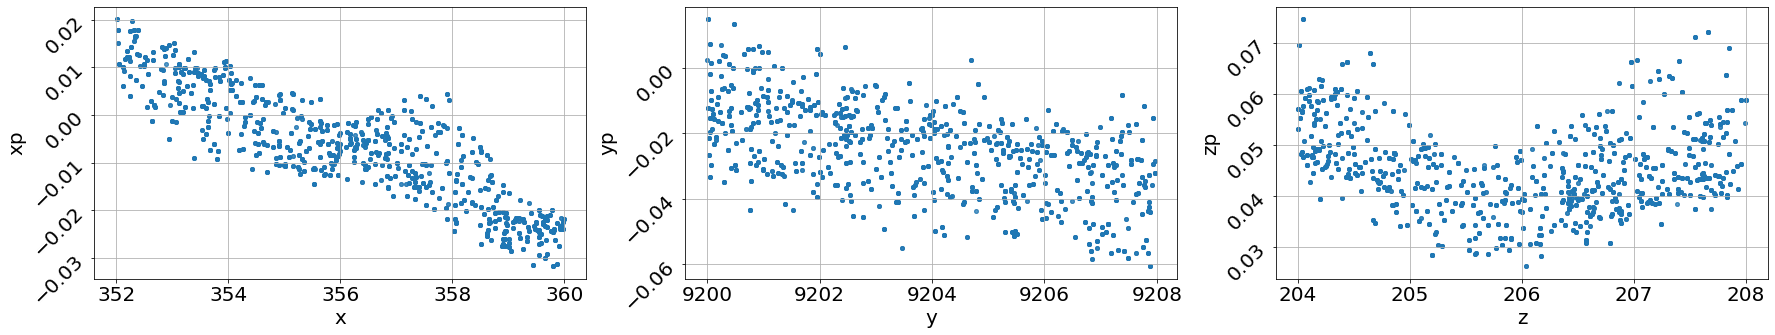

In [3]:
'''supercells = ['/bigdata/hplsim/aipp/Anna/lwfa_supercells/10700_40_1123_101.npy',
              '/bigdata/hplsim/aipp/Anna/lwfa_supercells/10700_24_1237_85.npy',
              '/bigdata/hplsim/aipp/Anna/lwfa_supercells/10700_40_1123_101.npy']'''

'''supercells = ['/bigdata/hplsim/aipp/Anna/lwfa_supercells_merged/10700_22_1094_3.npy',
             '/bigdata/hplsim/aipp/Anna/lwfa_supercells_merged/10700_46_1092_101.npy',
             '/bigdata/hplsim/aipp/Anna/lwfa_supercells_merged/10700_58_1209_86.npy']'''

supercells = ['/bigdata/hplsim/aipp/Anna/lwfa_tests/'+nextfile for nextfile in os.listdir('/bigdata/hplsim/aipp/Anna/lwfa_tests')]
#supercells = ['/bigdata/hplsim/aipp/Anna/lwfa_tests1/10700_44_1151_51.npy']
#supercells = ['/bigdata/hplsim/aipp/Anna/lwfa_supercell_44_1151_51/'+nextfile for nextfile in os.listdir('/bigdata/hplsim/aipp/Anna/lwfa_supercell_44_1151_51')]
supecells_tensors = []
for supercell in supercells:
    print(supercell)
    particle_tensor = np.loadtxt(supercell)
    supecells_tensors.append(particle_tensor)
    print(particle_tensor.shape)
    num_particles = 10000
    idx = np.random.randint(particle_tensor.shape[0], size=num_particles)
    particle_tensor = particle_tensor[idx, :]
    #for i in range(particle_tensor.shape[1]):
    #        minv = np.min(particle_tensor[:,i])
    #        maxv = np.max(particle_tensor[:,i])
    #        particle_tensor[:,i] = (particle_tensor[:,i]-minv)/(maxv-minv)
    
    plot_3D(particle_tensor)
        
    pc = particle_tensor
    slice_along = 2 #z: 2
    num_slices = 100
    comp_of_interest = -3
    figsize1 = 40
    figsize2 = 5

    labels_x = ['x', 'y', 'z']
    labels_y = ['xp', 'yp', 'zp']

    fig, axs = plt.subplots(1, 4, figsize=(figsize1,figsize2))
    plot_per_slice(axs=axs[0], comp_of_interest=None, 
                    num_slices=num_slices, pc=particle_tensor, slice_along=slice_along)
    for i in range(1,4,1):
        plot_per_slice(axs=axs[i], comp_of_interest=-1*i, 
                    num_slices=num_slices, pc=particle_tensor, slice_along=slice_along, label='Mean ' + labels_y[-1*i])
    plt.show()

    figsize1 = 30
    figsize2 = 5
    fig, axs = plt.subplots(1, 3, figsize=(figsize1,figsize2))

    for i in range(3):
        print(i, 0-i)
        plot_2D(axs=axs[i], comp_x=i, comp_y=i+3,
                pc=particle_tensor, label_x=labels_x[i], label_y=labels_y[i])
    plt.show()

In [13]:
for t in supecells_tensors:
    print(t.shape)

(438, 6)
(530, 6)
(446, 6)
(520, 6)
(529, 6)
(491, 6)
(537, 6)
(569, 6)


In [14]:
all_t = np.concatenate([t for t in supecells_tensors], axis=0)

In [15]:
print(all_t.shape)

(4060, 6)


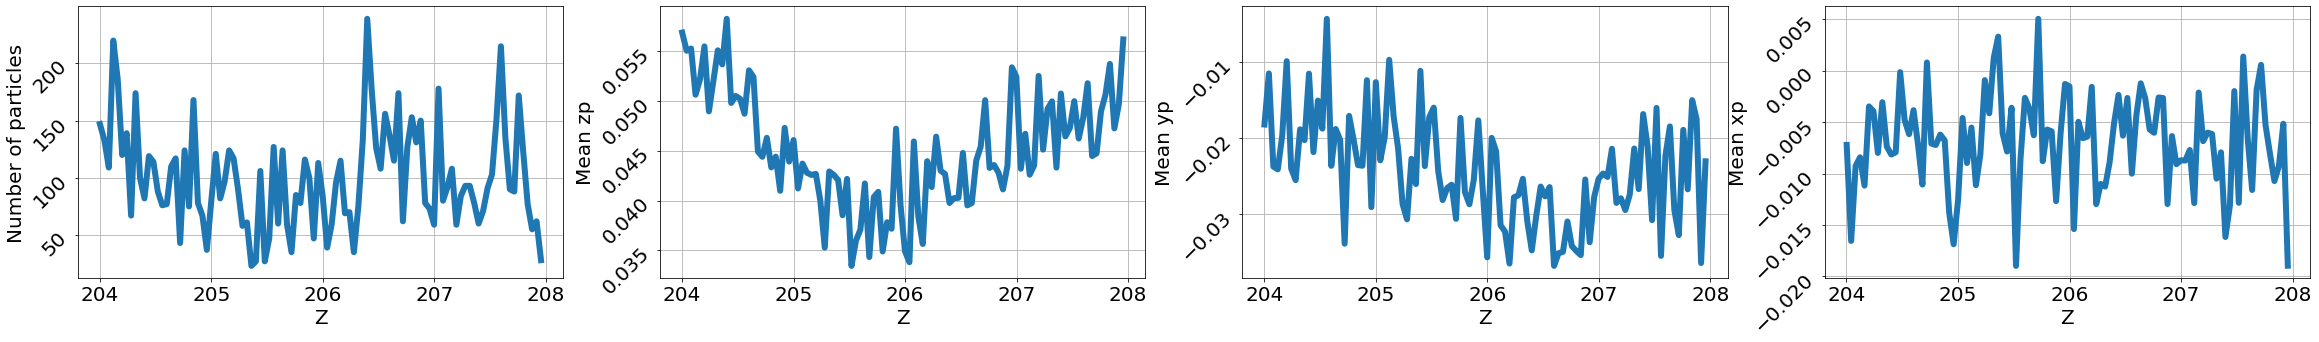

0 0
1 -1
2 -2


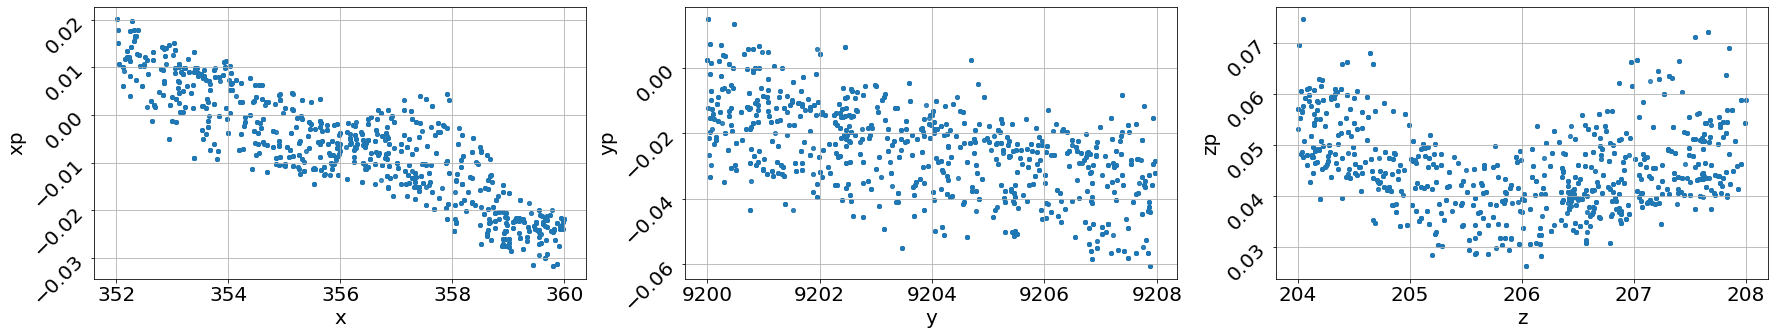

In [16]:
pc = all_t
slice_along = 2 #z: 2
num_slices = 100
comp_of_interest = -3
figsize1 = 40
figsize2 = 5

labels_x = ['x', 'y', 'z']
labels_y = ['xp', 'yp', 'zp']

fig, axs = plt.subplots(1, 4, figsize=(figsize1,figsize2))
plot_per_slice(axs=axs[0], comp_of_interest=None, 
                num_slices=num_slices, pc=particle_tensor, slice_along=slice_along)
for i in range(1,4,1):
    plot_per_slice(axs=axs[i], comp_of_interest=-1*i, 
                num_slices=num_slices, pc=particle_tensor, slice_along=slice_along, label='Mean ' + labels_y[-1*i])
plt.show()

figsize1 = 30
figsize2 = 5
fig, axs = plt.subplots(1, 3, figsize=(figsize1,figsize2))

for i in range(3):
    print(i, 0-i)
    plot_2D(axs=axs[i], comp_x=i, comp_y=i+3,
            pc=particle_tensor, label_x=labels_x[i], label_y=labels_y[i])
plt.show()